In [1]:
import os
import sys
import sv as SV
import numpy as np 
import pylab as pl
import astropy.table as atable
import astropy.io.fits as fits

from   tqdm.notebook import tqdm, trange

# 21.7e version for Everest. 
from   desispec.tsnr import tsnr2_to_efftime

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.use('Agg')
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
all_exps = SV.info_exposures(release='everest')

In [4]:
in_bright = (all_exps['FAPRGRM'] == 'bgsmws') | (all_exps['FAPRGRM'] == 'bright')
print("%i exposures in BRIGHT" % np.sum(in_bright))

sv1_exps = all_exps[(all_exps['SURVEY'] == 'sv1') & in_bright]
sv3_exps = all_exps[(all_exps['SURVEY'] == 'sv3') & in_bright]
main_exps = all_exps[(all_exps['SURVEY'] == 'main') & in_bright]

print('%i SV1 BRIGHT exposure' % len(sv1_exps))
print('%i SV3 BRIGHT exposure' % len(sv3_exps))
print('%i MAIN BRIGHT exposure' % len(main_exps))

1418 exposures in BRIGHT
635 SV1 BRIGHT exposure
298 SV3 BRIGHT exposure
409 MAIN BRIGHT exposure


/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$N_{\\rm exp}$')

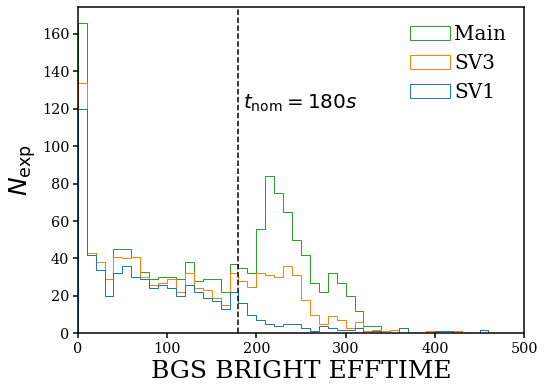

In [5]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_   = sub.hist([sv1_exps['BGS_EFFTIME_BRIGHT'], sv3_exps['BGS_EFFTIME_BRIGHT'], main_exps['BGS_EFFTIME_BRIGHT']], range=(0., 500), bins=50, stacked=True, label=['SV1', 'SV3', 'Main'], histtype='step')

sub.axvline(180, color='k', linestyle='--')
sub.text(185, 120, r'$t_{\rm nom}= 180s$', fontsize=20)

sub.legend(loc='upper right', fontsize=20, handletextpad=0.2)
sub.set_xlabel(r'BGS BRIGHT EFFTIME', fontsize=25)
sub.set_xlim(0., 500)
sub.set_ylabel(r'$N_{\rm exp}$', fontsize=25)

In [6]:
def compile_rr(exps, survey): 
    gals = [] 
    for i in trange(len(exps)): 
        try: 
            _gals = SV.get_zbest_exp(exps['TILEID'][i], exps['EXPID'][i], release='everest', survey=survey, ext_cols=[], exp_dX2=40.)
        except AssertionError: 
            continue 
        gals.append(_gals)
    return atable.vstack(gals)

In [7]:
near_nom = (sv1_exps['BGS_EFFTIME_BRIGHT'] > 160) & (sv1_exps['BGS_EFFTIME_BRIGHT'] < 200)

sv1_exps[near_nom]

NIGHT,EXPID,TILEID,TILERA,TILEDEC,MJD,SURVEY,FAPRGRM,FAFLAVOR,EXPTIME,EFFTIME_SPEC,GOALTIME,GOALTYPE,MINTFRAC,AIRMASS,EBV,SEEING_ETC,EFFTIME_ETC,TSNR2_ELG,TSNR2_QSO,TSNR2_LRG,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBDARK,TSNR2_GPBBRIGHT,TSNR2_GPBBACKUP,ELG_EFFTIME_DARK,BGS_EFFTIME_BRIGHT,LYA_EFFTIME_DARK,GPB_EFFTIME_DARK,GPB_EFFTIME_BRIGHT,GPB_EFFTIME_BACKUP,TRANSPARENCY_GFA,SEEING_GFA,FIBER_FRACFLUX_GFA,FIBER_FRACFLUX_ELG_GFA,FIBER_FRACFLUX_BGS_GFA,FIBERFAC_GFA,FIBERFAC_ELG_GFA,FIBERFAC_BGS_GFA,AIRMASS_GFA,SKY_MAG_AB_GFA,SKY_MAG_G_SPEC,SKY_MAG_R_SPEC,SKY_MAG_Z_SPEC,EFFTIME_GFA,EFFTIME_DARK_GFA,EFFTIME_BRIGHT_GFA,EFFTIME_BACKUP_GFA
int32,int32,int32,float64,float64,float64,bytes7,bytes16,bytes19,float64,float32,float64,bytes7,float64,float32,float64,float64,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20201218,68644,80612,66.68,-5.24,59202.22459972,sv1,bgsmws,sv1bgsmws,300.0010070800781,171.1516,0.0,bright,0.9,1.26963,0.05122321844100952,0.0,0.0,20.952724,5.08265,13.688762,8.618848882569,1222.5114,1725.9258,323.3774,2277.3179,180.19344,171.1516,98.5975457180189,149.40862,169.84839,166.90308,1.0042864939724667,1.0952459827853764,0.5619414713666072,0.4074967808812967,0.18785281852149527,0.9141705766461077,0.9165563914476362,0.9217111493640366,1.2701076559082927,20.92396638055517,22.20757076967689,21.40149922615739,19.723903257048825,164.1901775248753,154.53363002236713,164.1901775248753,175.86648702351312
20201218,68645,80612,66.68,-5.24,59202.23151057,sv1,bgsmws,sv1bgsmws,300.0979919433594,179.45139,0.0,bright,0.9,1.262242,0.05122321844100952,0.0,0.0,22.198978,5.3813157,14.39769,9.26497264066711,1281.7957,1812.4518,338.47516,2380.1042,190.91122,179.45139,105.98904516841742,156.89893,177.77821,174.43622,1.009471397520319,1.108553298776409,0.5533975367461605,0.4022084825062936,0.1856965561852464,0.8989511249328812,0.8989023277362183,0.9031466096879777,1.2627392115717027,21.44992826900792,22.200865025605903,21.379588310137994,19.652755313272536,156.72063643780757,147.52984941143305,156.72063643780757,169.5877371966596
20201218,68672,80619,144.0,65.0,59202.40698597,sv1,bgsmws,sv1bgsmws,300.08697509765625,183.57341,0.0,bright,0.9,1.223817,0.035708148032426834,0.0,0.0,23.093914,5.604284,14.927747,11.270953583950178,1311.2386,1941.7871,359.75494,2474.222,198.60767,183.57341,128.93698177336617,168.09514,188.95505,181.33405,0.9896109295302464,0.9293998784983915,0.6669069324443271,0.4708699789867281,0.21344507397527468,1.1106114565151195,1.075098319398474,1.0571692973933349,1.2241183864529335,20.725008468617467,22.27953399939353,21.153045086443957,19.076475521279527,213.4449205333816,203.85748766677594,213.4449205333816,269.0919935083795
20201218,68673,80619,144.0,65.0,59202.41391844,sv1,bgsmws,sv1bgsmws,300.0690002441406,170.45181,0.0,bright,0.9,1.216428,0.035708148032426834,0.0,0.0,21.384495,5.184302,13.767217,10.625154384505004,1217.513,1758.595,327.43906,2278.8691,183.90666,170.45181,121.54919519542396,152.2367,171.98169,167.01677,0.9792221152556593,0.9659125186876333,0.6410569478049033,0.45568331950563534,0.20747954150416967,1.065164015354027,1.0372629856801945,1.0240095631888306,1.2166845923132494,20.656512559719275,22.280886051687176,21.14971910763764,19.076246697791902,199.83906509035646,189.73276613869922,199.83906509035646,246.72919232932492
20201219,68801,80617,5.0,28.0,59203.14121402,sv1,bgsmws,sv1bgsmws,300.0909729003906,169.3149,0.0,bright,0.9,1.072357,0.03294771909713745,0.0,0.0,20.250278,5.0386,13.159578,11.464531835354865,1209.3921,1695.803,320.0998,2343.4673,174.1524,169.3149,131.15147012940275,146.80096,168.12688,171.75113,0.9942224375702047,1.0744618347755743,0.5863118272579355,0.4224420996108259,0.19399013006970905,0.962481431776583,0.9527860157331145,0.9516951376860239,1.0729883008868033,20.784817836679167,21.33276416376

In [8]:
sv1_gals = compile_rr(sv1_exps[near_nom], survey='sv1')

  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/80629/20210103/redrock-3-80629-thru20210103.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/80629/00070700/redrock-3-80629-exp00070700.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/80641/20210107/redrock-3-80641-thru20210107.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/80641/00070729/redrock-3-80641-exp00070729.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/80641/20210107/redrock-3-80641-thru20210107.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/80641/00070730/redrock-3-80641-exp00070730.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/80642/20210107/redrock-3-80642-thru20210107.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/80642/00070731/redrock-3-80642-exp00070731.fits does not ex

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

Text(0.5, 1.0, 'SV1')

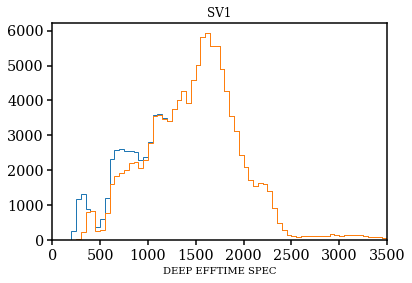

In [9]:
_ = pl.hist(tsnr2_to_efftime(sv1_gals['DEEP_TSNR2_BGS'], 'bgs'), bins=np.arange(0.0, 1.e4, 50.), histtype='step')
_ = pl.hist(tsnr2_to_efftime(sv1_gals['DEEP_TSNR2_BGS'][sv1_gals['DEEP_EXPTIME'] > 2000.], 'bgs'), bins=np.arange(0.0, 1.e4, 50.), histtype='step')

pl.xlim(0.0, 3.5e3)
pl.xlabel('DEEP EFFTIME SPEC')

pl.title('SV1')

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

Text(0.5, 1.0, 'SV1')

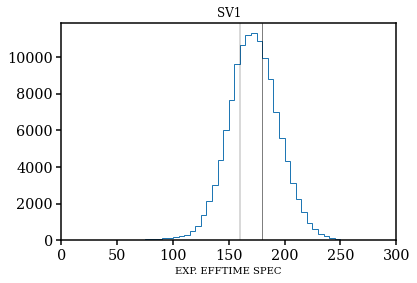

In [10]:
_ = pl.hist(tsnr2_to_efftime(sv1_gals['TSNR2_BGS'].data, 'bgs'), bins=np.arange(0.0, 4.e2, 5.), histtype='step')

pl.xlim(0.0, 300.)

pl.axvline(180., c='k', lw=0.5)
pl.axvline(160., c='k', lw=0.3)

pl.xlabel('EXP. EFFTIME SPEC')

pl.title('SV1')

In [11]:
near_nom = (sv3_exps['BGS_EFFTIME_BRIGHT'] > 160) & (sv3_exps['BGS_EFFTIME_BRIGHT'] < 200)

print('%i SV3 exposures near nominal' % np.sum(near_nom))

sv3_gals = compile_rr(sv3_exps[near_nom], survey='sv3')

39 SV3 exposures near nominal


  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/369/00085637/redrock-4-369-exp00085637.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/399/20210508/redrock-0-399-thru20210508.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/399/00087718/redrock-0-399-exp00087718.fits does not exist



INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

Text(0.5, 1.0, 'SV3')

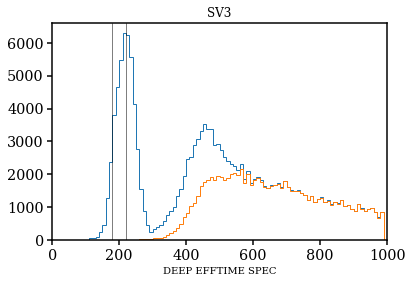

In [13]:
_ = pl.hist(tsnr2_to_efftime(sv3_gals['DEEP_TSNR2_BGS'], 'bgs'), bins=np.arange(0.0, 1.e3, 10.), histtype='step')
_ = pl.hist(tsnr2_to_efftime(sv3_gals['DEEP_TSNR2_BGS'], 'bgs')[sv3_gals['DEEP_NUMEXP'] > 2], bins=np.arange(0.0, 1.e3, 10.), histtype='step')

pl.xlim(0.0, 1.e3)
pl.xlabel('DEEP EFFTIME SPEC')
pl.axvline(180., c='k', lw=0.5)
pl.axvline(220., c='k', lw=0.5)
pl.title('SV3')

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

Text(0.5, 1.0, 'SV3')

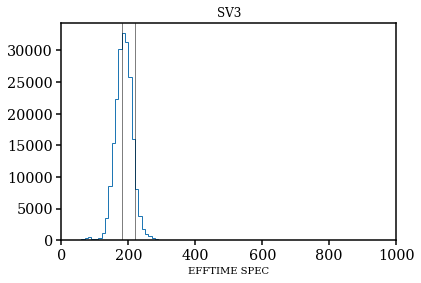

In [14]:
_ = pl.hist(tsnr2_to_efftime(sv3_gals['TSNR2_BGS'], 'bgs'), bins=np.arange(0.0, 1.e3, 10.), histtype='step')

pl.xlim(0.0, 1.e3)
pl.xlabel('EFFTIME SPEC')
pl.axvline(180., c='k', lw=0.5)
pl.axvline(220., c='k', lw=0.5)
pl.title('SV3')

In [12]:
near_nom = (main_exps['BGS_EFFTIME_BRIGHT'] > 160) & (main_exps['BGS_EFFTIME_BRIGHT'] < 200)

print('%i MAIN exposures near nominal' % np.sum(near_nom))

main_gals = compile_rr(main_exps[near_nom], survey='main')

26 MAIN exposures near nominal


  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/20654/20210514/redrock-1-20654-thru20210514.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/20654/00088360/redrock-1-20654-exp00088360.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/20818/20210611/redrock-9-20818-thru20210611.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/20818/00093390/redrock-9-20818-exp00093390.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/21102/20210612/redrock-9-21102-thru20210612.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/21102/00093468/redrock-9-21102-exp00093468.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/cumulative/20103/20210612/redrock-9-20103-thru20210612.fits does not exist
  /global/cfs/cdirs/desi/spectro/redux/everest/tiles/perexp/20103/00093473/redrock-9-20103-exp00093473.fits does not ex

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

Text(0.5, 1.0, 'MAIN')

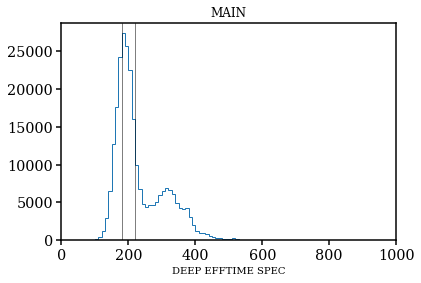

In [17]:
_ = pl.hist(tsnr2_to_efftime(main_gals['DEEP_TSNR2_BGS'], 'bgs'), bins=np.arange(0.0, 1.e3, 10.), histtype='step')

pl.xlim(0.0, 1.e3)
pl.xlabel('DEEP EFFTIME SPEC')
pl.axvline(180., c='k', lw=0.5)
pl.axvline(220., c='k', lw=0.5)
pl.title('MAIN')

INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbdark.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-elg.fits apply scale factor = 1.261
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-gpbbright.fits apply scale factor = 1.000
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-lya.fits apply scale factor = 0.998
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/code/desimodel/0.16.0/data/tsnr/tsnr-ensemble-bgs.fits apply scale factor = 2.652
INFO:tsnr.py:444:get_ensemble: for /global/common/software/desi/cori/desiconda/202008

Text(0.5, 1.0, 'MAIN')

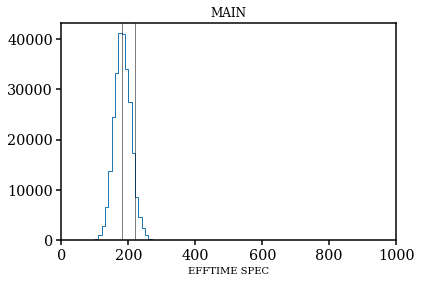

In [18]:
_ = pl.hist(tsnr2_to_efftime(main_gals['TSNR2_BGS'], 'bgs'), bins=np.arange(0.0, 1.e3, 10.), histtype='step')

pl.xlim(0.0, 1.e3)
pl.xlabel('EFFTIME SPEC')
pl.axvline(180., c='k', lw=0.5)
pl.axvline(220., c='k', lw=0.5)
pl.title('MAIN')

In [13]:
# save compiled zsuccess rates to file
dat_dir = '/global/cscratch1/sd/mjwilson/desi/BGS/bgs-cmxsv/'

sv1_gals.write(os.path.join(dat_dir,  'sv1.bgs_exps.efftime160_200.zsuccess.v3.fits'), overwrite=True)
sv3_gals.write(os.path.join(dat_dir,  'sv3.bgs_exps.efftime160_200.zsuccess.v3.fits'), overwrite=True)
main_gals.write(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.v3.fits'), overwrite=True)

# Done.